# Keras Secuencial y Funcional 


### Conjunto de datos

In [1]:
# Import required library
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [216]:
train_data = pd.read_csv("metrics.csv")

In [217]:
train_data.head()

,vel,angs,logCountM,distDif,clickD,clickTotalM,backSpaceM,leftSideM,rigthSideM,stressLevelM
0,1768.591350,33.754428,422,858.677921,19705.0,3,0,0,0,2
1,2111.446145,30.625793,441,1488.664138,19695.0,3,0,0,0,3
2,1410.154650,31.546801,325,875.608240,12953.0,4,0,0,0,3
3,1487.615475,28.488154,296,1217.816882,9752.0,3,0,0,0,3
4,1155.837119,36.113308,253,313.596228,82273.0,8,10,189,144,2


In [218]:
train_labels = train_data['stressLevelM']

In [219]:
columns_to_extract =['vel','angs','logCountM','distDif','clickD','clickTotalM','backSpaceM','leftSideM','rigthSideM']

In [220]:
train_features = train_data[columns_to_extract]

In [221]:
train_features = train_features.astype('float32')

In [222]:
train_features.head()

,vel,angs,logCountM,distDif,clickD,clickTotalM,backSpaceM,leftSideM,rigthSideM
0,1768.591309,33.754429,422.0,858.677917,19705.0,3.0,0.0,0.0,0.0
1,2111.446045,30.625793,441.0,1488.664185,19695.0,3.0,0.0,0.0,0.0
2,1410.154663,31.546801,325.0,875.608215,12953.0,4.0,0.0,0.0,0.0
3,1487.615479,28.488153,296.0,1217.816895,9752.0,3.0,0.0,0.0,0.0
4,1155.837158,36.113308,253.0,313.596222,82273.0,8.0,10.0,189.0,144.0


In [223]:
train_features=train_features.to_numpy()

In [224]:
train_labels = pd.concat([train_labels, pd.get_dummies(train_labels,prefix='stressLevelM')],axis=1)
train_labels.drop(['stressLevelM'], axis=1, inplace=True)

In [225]:
train_labels = train_labels.astype('float32')

In [226]:
train_labels

,stressLevelM_1,stressLevelM_2,stressLevelM_3
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
480,0.0,1.0,0.0
481,0.0,1.0,0.0
482,0.0,1.0,0.0
483,0.0,1.0,0.0


In [227]:
train_labels=train_labels.to_numpy()

In [358]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((9,)),
    tf.keras.layers.Dense(10000, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(50000, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10000, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax'),
])

In [359]:
model.compile(optimizer='adam',loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [360]:
history = model.fit(train_features, train_labels, validation_split=0.2, epochs=100)

Epoch 1/100


In [354]:
test_loss, test_acc = model.evaluate(train_features, train_labels, verbose=2)

16/16 - 0s - loss: 0.8236 - accuracy: 0.5237 - 85ms/epoch - 5ms/step


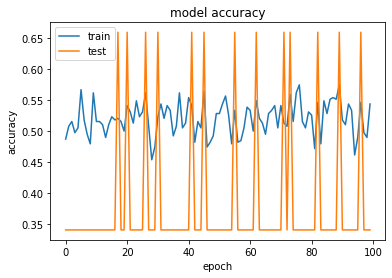

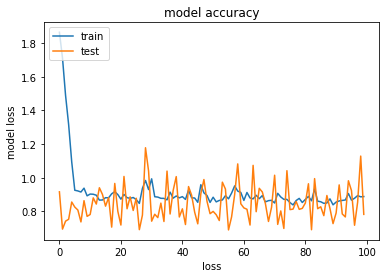

In [355]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('model loss')
plt.xlabel('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [233]:
test_data = pd.read_csv("metricscombi.csv")

In [234]:
columns_to_extract =['vel','angs','logCountM','distDif','clickD','clickTotalM','backSpaceM','leftSideM','rigthSideM']
test_features = test_data[columns_to_extract]


In [235]:
test_features.head()

,vel,angs,logCountM,distDif,clickD,clickTotalM,backSpaceM,leftSideM,rigthSideM
0,1768.591350,33.754428,422,858.677921,19705.0,3,0,0,0
1,2111.446145,30.625793,441,1488.664138,19695.0,3,0,0,0
2,1410.154650,31.546801,325,875.608240,12953.0,4,0,0,0
3,1487.615475,28.488154,296,1217.816882,9752.0,3,0,0,0
4,1155.837119,36.113308,253,313.596228,82273.0,8,10,189,144


In [236]:
prediction = model.predict(test_features)

In [237]:
prediction

array([[0.04604691, 0.56910855, 0.38484448],
       [0.04604691, 0.56910855, 0.38484448],
       [0.04604691, 0.56910855, 0.38484448],
       ...,
       [0.04604691, 0.56910855, 0.38484448],
       [0.04604691, 0.56910855, 0.38484448],
       [0.04604691, 0.56910855, 0.38484448]], dtype=float32)

In [238]:
out =prediction.round().astype(int)

In [242]:
for i in range (len(out)):
    if out[i][2]==1:
        print(out[i][2])

In [149]:
model.save('modelo_entrenado.h5')